In [523]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
path = './datasets/movielens'

In [4]:
os.listdir(path)

['links.csv',
 'tags.csv',
 'ratings.csv',
 'README.txt',
 '.ipynb_checkpoints',
 'movies.csv']

In [19]:
ratings_df = pd.read_csv(os.path.join(path,"ratings.csv"),encoding = 'utf-8')

In [20]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [21]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [22]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [23]:
ratings_df.drop("timestamp",axis=1,inplace=True)

In [24]:
ratings_df.shape

(100836, 3)

In [113]:
#유저 수
n_unique_users = len(ratings_df['userId'].unique())
print("유저 수:",n_unique_users)

유저 수: 610


In [115]:
#영화 수
n_unique_movies = len(ratings_df["movieId"].unique())
print("평가된 영화 수 :", n_unique_movies)

평가된 영화 수 : 9724


In [112]:
print('평점 평균',ratings_df["rating"].mean())
print('평점 표준편차',ratings_df['rating'].std())

평점 평균 3.501556983616962
평점 표준편차 1.042529239060635


array([[<AxesSubplot:title={'center':'userId'}>,
        <AxesSubplot:title={'center':'movieId'}>],
       [<AxesSubplot:title={'center':'rating'}>, <AxesSubplot:>]],
      dtype=object)

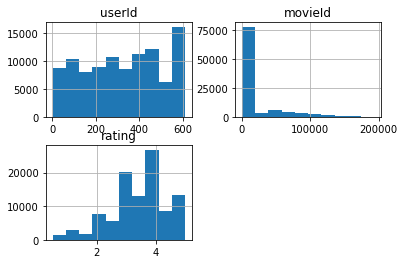

In [119]:
ratings_df[['userId','movieId','rating']].hist()

In [104]:
import seaborn as sns

<AxesSubplot:xlabel='rating', ylabel='Density'>

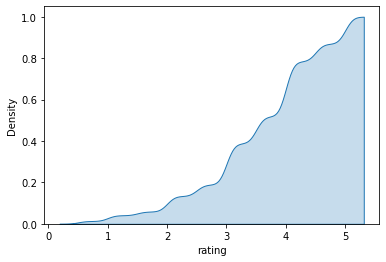

In [105]:
sns.kdeplot(ratings_df['rating'], cumulative=True, shade= True)

/opt/homebrew/Caskroom/miniforge/base/envs/m1/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='movieId', ylabel='Density'>

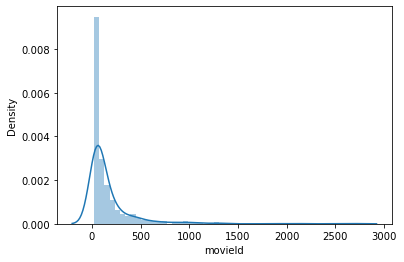

In [125]:
user_info = ratings_df.groupby('userId')['movieId'].count()
sns.distplot(user_info)

In [27]:
from sklearn.model_selection import train_test_split

In [560]:
train_df, test_df = train_test_split(ratings_df, test_size = 0.2,random_state=42)

In [738]:
Interaction = train_df.pivot_table('rating',index =  'userId', columns='movieId')

In [739]:
Interaction

movieId,1,2,3,4,5,6,7,8,9,10,...,191005,193565,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [740]:
Interaction.fillna(0,inplace=True)

In [741]:
num_user = Interaction.shape[0]

In [742]:
num_item = Interaction.shape[1]

In [755]:
#number of latent factor
f=20

In [756]:
p_u = np.random.rand(num_user,f)*0.01

In [757]:
q_i = np.random.rand(num_item,f)*0.01

In [758]:
p_u,q_i

(array([[0.00647417, 0.00150562, 0.00383414, ..., 0.001775  , 0.00163348,
         0.00273857],
        [0.00338485, 0.00995582, 0.00940305, ..., 0.00840055, 0.00332904,
         0.00051408],
        [0.00319451, 0.00091205, 0.00595691, ..., 0.00693814, 0.00231496,
         0.00125727],
        ...,
        [0.0066393 , 0.00957264, 0.00288871, ..., 0.0021806 , 0.00196051,
         0.0041688 ],
        [0.0088215 , 0.00093572, 0.00202905, ..., 0.0056045 , 0.00357375,
         0.00465133],
        [0.00691687, 0.00278736, 0.00284591, ..., 0.00864021, 0.00208616,
         0.00788708]]),
 array([[0.00081046, 0.0043763 , 0.0072843 , ..., 0.00155686, 0.00193433,
         0.00152734],
        [0.00373918, 0.00887387, 0.00417049, ..., 0.00983484, 0.00820837,
         0.00364849],
        [0.00484801, 0.0033029 , 0.00181768, ..., 0.0011569 , 0.00178872,
         0.00506541],
        ...,
        [0.00903252, 0.00411776, 0.00947445, ..., 0.00775684, 0.00821884,
         0.00290985],
        [0.0

In [759]:
#confidence matrix C
#각각 등장 횟수를 카운팅하여(빈도) 신뢰도(가중치)로 설정함
#0~1로 MinMaxscaling하여 사용, Zero 방지 위해 0.0001 더해줌.

In [760]:
user_confience = (Interaction>0).sum(axis=1)

In [761]:
user_confience

userId
1       193
2        25
3        31
4       170
5        38
       ... 
606     914
607     145
608     679
609      31
610    1044
Length: 610, dtype: int64

In [762]:
item_confidence = (Interaction.T>0).sum(axis=1)

In [763]:
item_confidence

movieId
1         174
2          91
3          40
4           6
5          34
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Length: 8983, dtype: int64

In [777]:
train_df

,userId,movieId,rating,confidence
80568,509,7347,3.0,388
50582,326,71462,4.0,130
8344,57,2115,3.0,465
99603,610,1127,4.0,1097
71701,462,2409,2.0,392
...,...,...,...,...
6265,42,4005,4.0,359
54886,364,141,4.0,86
76820,480,6867,4.0,676
860,6,981,3.0,248


In [764]:
train_df['confidence'] = train_df.apply(lambda x: user_confience.loc[x['userId']]+item_confidence.loc[x['movieId']], axis=1)

<ipython-input-764-fc7c68aeb506>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['confidence'] = train_df.apply(lambda x: user_confience.loc[x['userId']]+item_confidence.loc[x['movieId']], axis=1)


In [765]:
confidence_matrix = train_df.pivot_table(values= "confidence",index = 'userId',columns="movieId")
confidence_matrix.fillna(1,inplace=True)
confidence_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,191005,193565,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,367.0,1.0,233.0,1.0,1.0,272.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,1088.0,1.0,1.0,1.0,1.0,1.0,957.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
607,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
608,853.0,770.0,719.0,1.0,1.0,1.0,1.0,1.0,1.0,784.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [766]:
confidence_matrix=np.array(confidence_matrix)

In [767]:
from sklearn.preprocessing import MinMaxScaler

In [768]:
scaler = MinMaxScaler()

In [769]:
confidence_matrix

array([[3.670e+02, 1.000e+00, 2.330e+02, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [8.530e+02, 7.700e+02, 7.190e+02, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [2.050e+02, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.218e+03, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [770]:
minmaxconf = scaler.fit_transform(confidence_matrix)

In [771]:
minmaxconf+=0.0001

In [772]:
minmaxconf

array([[1.59577124e-01, 1.00000000e-04, 1.07457705e-01, ...,
        1.00000000e-04, 1.00000000e-04, 1.00000000e-04],
       [1.00000000e-04, 1.00000000e-04, 1.00000000e-04, ...,
        1.00000000e-04, 1.00000000e-04, 1.00000000e-04],
       [1.00000000e-04, 1.00000000e-04, 1.00000000e-04, ...,
        1.00000000e-04, 1.00000000e-04, 1.00000000e-04],
       ...,
       [3.71341830e-01, 3.47749186e-01, 3.32353586e-01, ...,
        1.00000000e-04, 1.00000000e-04, 1.00000000e-04],
       [8.89888889e-02, 1.00000000e-04, 1.00000000e-04, ...,
        1.00000000e-04, 1.00000000e-04, 1.00000000e-04],
       [5.30383224e-01, 1.00000000e-04, 1.00000000e-04, ...,
        1.00000000e-04, 1.00000000e-04, 1.00000000e-04]])

In [773]:
test_ratings = test_df.pivot_table(values = "rating",index = "userId",columns="movieId")
test_ratings.fillna(0,inplace=True)
test_ratings = np.array(test_ratings)

## objective function
$$\min_{p, q, b} \sum_{(u, i) \in K} c_{ui}( r_{ui}-b_u-b_i-b-q^T_i p_u  )^2 + \lambda (\Vert{q_i}\Vert^2 + \Vert{p_u}\Vert^2+b_u^2+b_i^2)$$

In [782]:
class MatrixFactorization():
    def __init__(self,ratings,test_ratings,latent_factors,learning_rate,confidence,reg,epochs):
        self.ratings=  ratings
        self.test_ratings = test_ratings
        self.num_user,self.num_item = ratings.shape
        self.latent_factors = latent_factors
        self.learning_rate = learning_rate
        self.reg= reg
        self.epochs = epochs
        self.confidence = confidence
        
    def fit(self):
        
        #latent factors
        self.p_u = np.random.normal(size=(self.num_user,self.latent_factors))
        self.q_i = np.random.normal(size=(self.num_item,self.latent_factors))
        
        #biases
        self.b_u = np.zeros(self.num_user)
        self.b_i = np.zeros(self.num_item)
        self.b = np.mean(self.ratings[self.ratings!=0])
        
        self.training_process = []
        for epoch in range(self.epochs):

            for i in range(self.num_user):
                for j in range(self.num_item):
                    if self.ratings[i,j] >0:
                        self.gradient_descent(i,j,self.ratings[i,j])
            loss = self.loss()
            test_loss= self.test_loss()
            self.training_process.append((epoch,loss,test_loss))
            
            print("Epoch: %d ; loss = %.4f ; test_loss = %.4f" % (epoch + 1, loss, test_loss))
            
    def test_loss(self):
        xi,yi = self.test_ratings.nonzero()
        predicted = self.get_whole_prediction()
        test_loss=0
        for x, y in zip(xi,yi):
            test_loss += np.power(self.test_ratings[x,y] - predicted[x,y],2)
        return np.sqrt(test_loss) / len(xi)
    
    def loss(self):
        xi,yi = self.ratings.nonzero()
        predicted = self.get_whole_prediction()
        loss = 0
        for x, y in zip(xi, yi):
            loss += np.power(self.ratings[x, y] - predicted[x, y], 2)
        return np.sqrt(loss) / len(xi)
        
  
    def gradient_descent(self, i, j, rating):
  
        prediction = self.get_each_prediction(i, j)
        
        dbu=-2*self.confidence[i][j]*(rating -self.b_u[i]-self.b_i[j]-self.b-prediction) + 2*self.reg * self.b_u[i]
        dbi=-2*self.confidence[i][j]*(rating -self.b_u[i]-self.b_i[j]-self.b-prediction) + 2*self.reg * self.b_i[i]
        self.b_u[i] -= self.learning_rate * dbu
        self.b_i[j] -= self.learning_rate * dbi
        
        dp = -2*self.confidence[i][j]*(rating -self.b_u[i]-self.b_i[j]-self.b-prediction) * self.q_i[j, :] + 2*(self.reg * self.p_u[i, :])
        dq = -2*self.confidence[i][j]*(rating -self.b_u[i]-self.b_i[j]-self.b-prediction) * self.p_u[i, :] + 2*(self.reg * self.q_i[j, :])
        
        self.p_u[i, :] -= self.learning_rate * dp
        self.q_i[j, :] -= self.learning_rate * dq

    
    def get_each_prediction(self,i,j):
        return self.b + self.b_u[i] + self.b_i[j]  + np.dot(self.p_u[i, :],self.q_i[j, :].T)
    
    
    def get_whole_prediction(self):
        return self.b + self.b_u[:, np.newaxis] + self.b_i[np.newaxis:, ] + np.dot(self.p_u,self.q_i.T)
    
    def plot_results(self):
        df = pd.DataFrame(self.training_process)
        df.columns= ["epoch","train_loss","test_loss"]
        print(df)
        df.loc[:][["train_loss","test_loss"]].plot()
        plt.xlabel("epoch")
        plt.ylabel("RMSE")
        plt.legend()
        plt.show()
        

In [783]:
Interaction=np.array(Interaction)

Epoch: 1 ; loss = 0.0096 ; test_loss = 0.0207
Epoch: 2 ; loss = 0.0088 ; test_loss = 0.0192
Epoch: 3 ; loss = 0.0083 ; test_loss = 0.0185
Epoch: 4 ; loss = 0.0080 ; test_loss = 0.0180
Epoch: 5 ; loss = 0.0078 ; test_loss = 0.0177
Epoch: 6 ; loss = 0.0077 ; test_loss = 0.0174
Epoch: 7 ; loss = 0.0076 ; test_loss = 0.0172
Epoch: 8 ; loss = 0.0075 ; test_loss = 0.0171
Epoch: 9 ; loss = 0.0074 ; test_loss = 0.0170
Epoch: 10 ; loss = 0.0073 ; test_loss = 0.0169
Epoch: 11 ; loss = 0.0073 ; test_loss = 0.0168
Epoch: 12 ; loss = 0.0072 ; test_loss = 0.0167
Epoch: 13 ; loss = 0.0072 ; test_loss = 0.0166
Epoch: 14 ; loss = 0.0072 ; test_loss = 0.0166
Epoch: 15 ; loss = 0.0072 ; test_loss = 0.0165
Epoch: 16 ; loss = 0.0071 ; test_loss = 0.0165
Epoch: 17 ; loss = 0.0071 ; test_loss = 0.0164
Epoch: 18 ; loss = 0.0071 ; test_loss = 0.0164
Epoch: 19 ; loss = 0.0071 ; test_loss = 0.0163
Epoch: 20 ; loss = 0.0071 ; test_loss = 0.0163
Epoch: 21 ; loss = 0.0070 ; test_loss = 0.0163
Epoch: 22 ; loss = 0.0

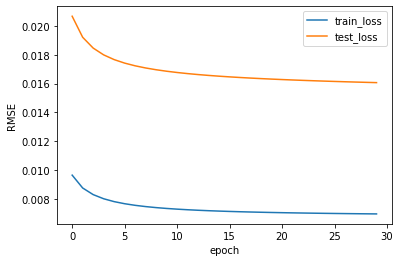

In [784]:
MF = MatrixFactorization(Interaction,test_ratings, latent_factors=20, learning_rate=0.01,confidence=minmaxconf,reg=0.01, epochs=30)
MF.fit()
MF.plot_results()